# MA 641 Project - NON-SEASONAL DATA : Analyzing Deutsche Bank's Stock Price Behaviour in its Home Market (Germany)

# 📝 Problem Statement

The goal of this project is to develop a time series forecasting model for Deutsche Bank’s stock price using real-world financial data. Specifically, the project focuses on analyzing, visualizing, and preparing the closing prices of Deutsche Bank (ticker: DBK.DE) traded on the Frankfurt Stock Exchange.

The project involves the following tasks:
- Exploratory data analysis and visualization of the closing price time series.
- Checking and handling missing values and potential outliers.
- Making the dataset stationary using appropriate transformations.
- Identifying suitable ARIMA models through ACF and PACF plots.
- Evaluating parameter significance and avoiding redundancy.
- Selecting the best model based on statistical criteria (AIC, BIC, p-values).
- Preparing the stationary series for future forecasting stages.

This project mimics the workflow of professional data science projects in industry, where understanding, cleaning, and modeling real-world noisy datasets is crucial for making accurate and interpretable forecasts.



## 🟦 Dataset Description

**Dataset Name**: Deutsche Bank Stock Prices (Germany)

**Source**: [Kaggle – Deutsche Bank Equity NYQ, GER, and FRA from 2010](https://www.kaggle.com/datasets/sandhyakrishnan02/deutsche-bank-equity-nyq-ger-and-fra-from-2010)

---

### **Original Full Dataset Overview**

- **Description**:  
  This dataset contains historical **daily stock prices** of Deutsche Bank (DBK.DE), listed on the **Frankfurt Stock Exchange**. Each row corresponds to one trading day, including fields like opening price, highest/lowest price, closing price, adjusted close price, and trading volume.  
  The complete dataset provides a detailed view of Deutsche Bank's stock behavior across more than a decade, useful for long-term analysis.

- **Number of Rows**: ~3,300  
- **Time Period Covered**: 2010-01-04 to 2023-01-20  
- **Data Frequency**: Daily (trading days only)  
- **Exchange**: Frankfurt Stock Exchange (Germany)

---

### **Subset Used for Modeling**


| Attribute | Value |
|:---|:---|
| **Start Date (Subset)** | 2021-01-04 |
| **End Date (Subset)** | 2023-01-20 |
| **Total Observations (Subset)** | 520 rows |
| **Frequency** | Daily (trading days only) |

This ensures focus on recent Deutsche Bank stock price behavior.

---

### **Column Descriptions**

| **Column Name** | **Description** |
|-----------------|------------------|
| `Date`          | Date of the trading day |
| `Open`          | Opening price of the stock |
| `High`          | Highest price during the day |
| `Low`           | Lowest price during the day |
| `Close`         | Closing price of the stock |
| `Adj Close`     | Adjusted closing price after dividends/splits |
| `Volume`        | Number of shares traded on that day |

---

## **Purpose behind using this Dataset:**

- Deutsche Bank is **headquartered in Germany**, making the German stock listing the most representative.
- Financial stock prices typically show **trends and volatility** but **no strong seasonality**, ideal for non-seasonal ARIMA modeling.
- Using a subset of recent **two years (2021–2023)** ensures the analysis captures the latest market dynamics.
- Limiting to ~520 observations helps satisfy the **Box-Jenkins modeling assumptions** and the project’s structural requirements.

## **Step 1 : Data Visualization**

In [1]:
#Loading dataset

from google.colab import drive
drive.mount('/content/drive')

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Setting file path
file_path = '/content/drive/My Drive/MA 641A - Time Series Analysis Project/Non-Seasonal/DBK.DE.csv'


# Loading the complete dataset
df = pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
# Handling the date Values

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Required format is dd-mm-yyyy
df = df.set_index('Date')
df = df.sort_index()

# Subset for last 2 years
df_small = df['2021-01-04':'2023-01-20']

# Validating the subset
print(f"Start Date (subset): {df_small.index.min()}")
print(f"End Date (subset): {df_small.index.max()}")
print(f"Total Observations (subset): {len(df_small)}")



Start Date (subset): 2021-01-04 00:00:00
End Date (subset): 2023-01-20 00:00:00
Total Observations (subset): 527


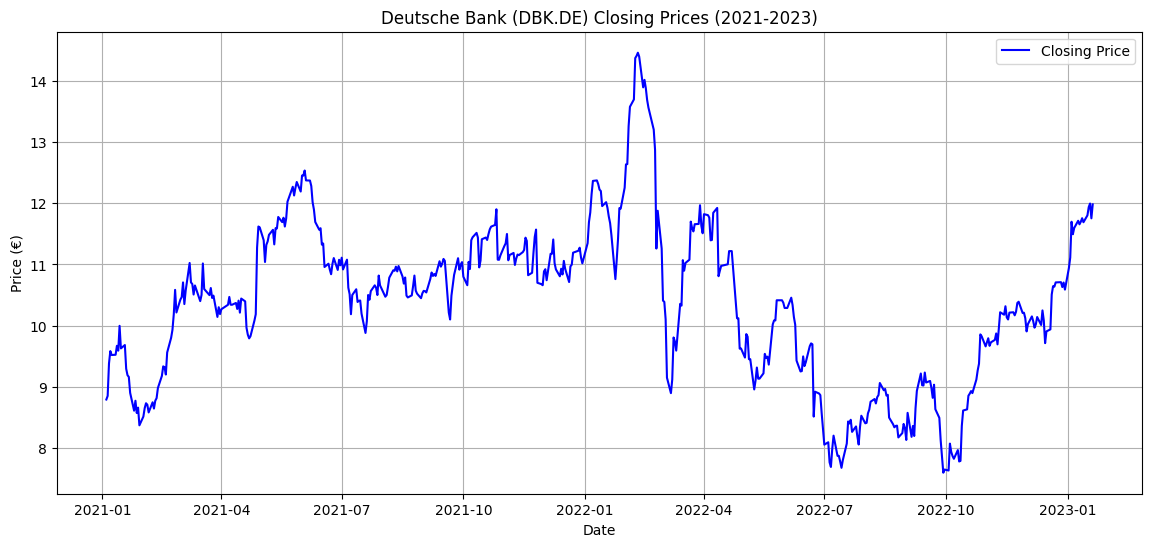

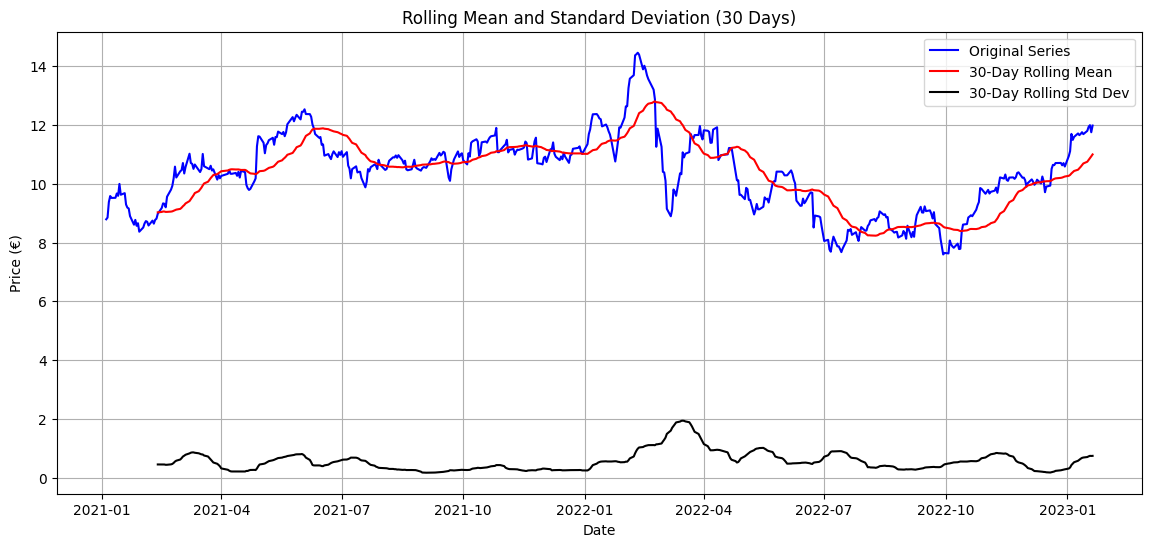

In [3]:
# Plotting the complete closing price series

ts = df_small['Close']

plt.figure(figsize=(14, 6))
plt.plot(ts, label='Closing Price', color='blue')
plt.title('Deutsche Bank (DBK.DE) Closing Prices (2021-2023)')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.grid(True)
plt.show()


# Plotting Rolling Mean and Rolling Standard Deviation (30 day period)
rolling_mean = ts.rolling(window=30).mean()
rolling_std = ts.rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(ts, label='Original Series', color='blue')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='red')
plt.plot(rolling_std, label='30-Day Rolling Std Dev', color='black')
plt.title('Rolling Mean and Standard Deviation (30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### >> Time Series Plot

- The plot of Deutsche Bank (DBK.DE) closing prices between **2021-01-04** and **2023-01-20** shows significant **volatility**.
- Notable spikes and dips are observed, particularly during early 2022, indicating periods of rapid price movement.
- Overall, the series exhibits **trending behavior**, but with high short-term fluctuations.
- The pattern does **not show any strong seasonality**, aligning with the characteristics of a **non-seasonal financial time series**.

### >> Rolling Mean and Standard Deviation

- The **30-Day Rolling Mean** (red line) smooths out short-term fluctuations and highlights the underlying trend.
- The **Rolling Standard Deviation** (black line) shows varying volatility levels over time:
  - Volatility **increased sharply** during early 2022, aligning with market-wide uncertainties.
  - Periods of **low volatility** are seen during mid-2021 and late 2022.
- **Non-constant variance** is noticeable, which may suggest that transformations (like log transformation) could be helpful before modeling.

### >> Key Observations:

| Aspect               | Conclusion |
|:----------------------|:-----------|
| Trend presence        | Yes        |
| Strong seasonality    | No         |
| Volatility (variance) | Changes over time |

---

###  **Conclusion**:  
The DBK.DE closing price series is **non-stationary** due to trends and changing variance.  
Hence, it **requires differencing and transformation** before ARIMA modeling.

---

In [4]:
# # Earliest and latest dates in the dataset
# print(f"Start Date: {df.index.min()}")
# print(f"End Date: {df.index.max()}")

## Verification for Outliers and Missing Values (Using IQR Method)

🔎 Missing values per column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


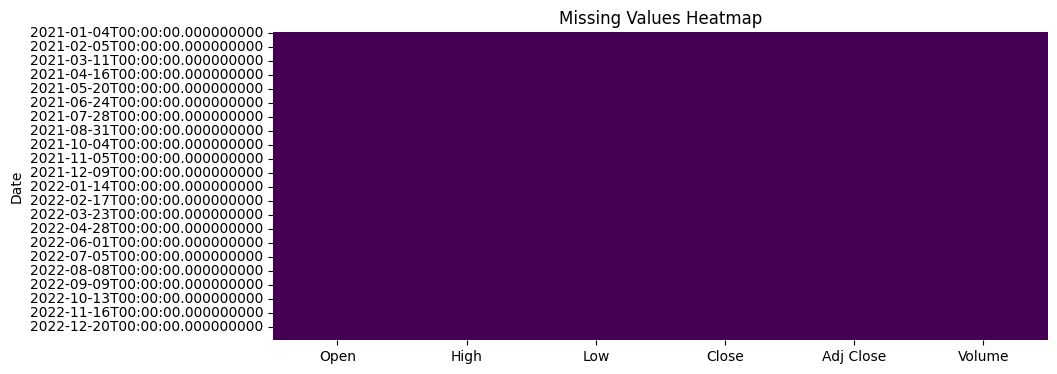



 !! Number of outliers detected in 'Close': 7




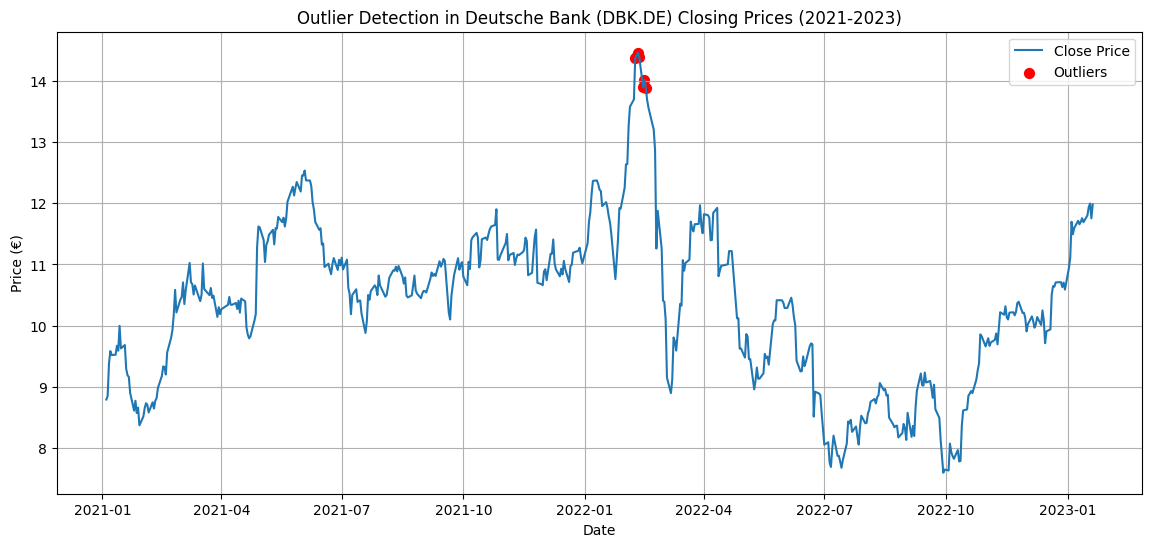

In [5]:
import seaborn as sns

# Check missing values column-wise
print("🔎 Missing values per column:")
print(df_small.isnull().sum())

# Visual Heatmap (if missing values are there)
plt.figure(figsize=(10, 4))
sns.heatmap(df_small.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# ------------------------
# 1.3 Detect Outliers (IQR Method)
# ------------------------

# We'll focus on 'Close' column
Q1 = df_small['Close'].quantile(0.25)
Q3 = df_small['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_small[(df_small['Close'] < lower_bound) | (df_small['Close'] > upper_bound)]

print("\n")

print(f" !! Number of outliers detected in 'Close': {len(outliers)}")

print("\n")

# Plotting Closing Price with Outliers
plt.figure(figsize=(14, 6))
plt.plot(df_small.index, df_small['Close'], label='Close Price')
plt.scatter(outliers.index, outliers['Close'], color='red', label='Outliers', s=50)
plt.title('Outlier Detection in Deutsche Bank (DBK.DE) Closing Prices (2021-2023)')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.grid(True)
plt.show()

### >> Missing Values Check

- A heatmap of missing values was generated for the dataset.
- **Observation**:  
  ➔ No missing values were found in any of the key columns (`Open`, `High`, `Low`, `Close`, `Adj Close`, and `Volume`).
  ➔ This implies dataset is complete and clean — no imputation is needed.

### >> Outlier Detection

- Outlier detection was performed on the `Close` prices using a threshold-based method.
- Outliers were visually represented on the time series plot with red markers.

- **Result**:
- **Number of Outliers Detected**: **7**
- Outliers correspond to unusually sharp peaks observed around early 2022.
- These anomalies could be due to market-specific events affecting Deutsche Bank’s stock temporarily.

 **Visual Insight**:
- Outliers are short-lived and localized, suggesting that they **do not significantly distort** the overall trend or structure of the series.
- These can either be:
- Retained (if modeling real-world behavior)  
- Or adjusted/treated (if improving model performance is needed — but not mandatory in this case).

**>> Conclusion**:  
No missing values exist. Although some outliers are present, they seem to reflect **real market phenomena** and are retained for modeling without correction.

---

## **Step 2: Making the Dataset Stationary**

<ipython-input-6-946a40cb9424>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['Log_Close'] = np.log(df_small['Close'])


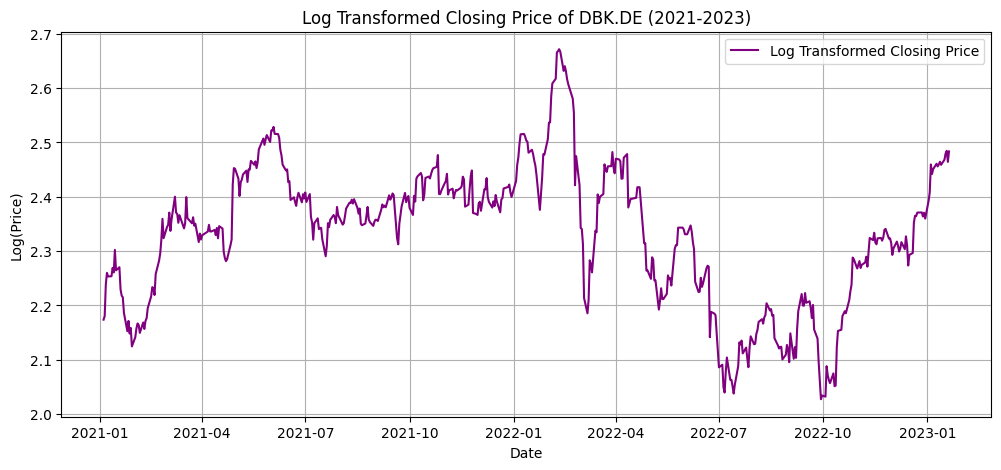

<ipython-input-6-946a40cb9424>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['Log_Close_Diff'] = df_small['Log_Close'].diff().dropna()


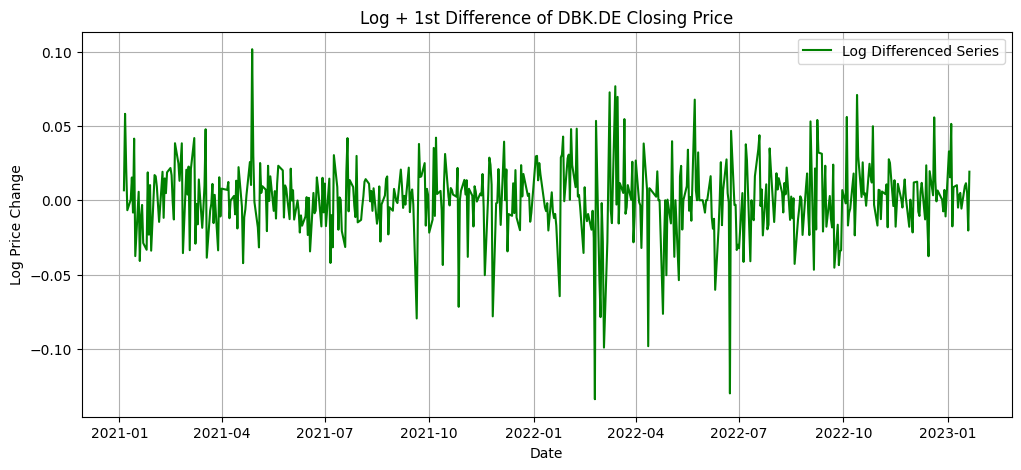

 Augmented Dickey-Fuller Test: Original Closing Price
ADF Statistic              -2.111891
p-value                     0.239760
# Lags Used                15.000000
Number of Observations    511.000000
Critical Value (1%)        -3.443212
Critical Value (5%)        -2.867213
Critical Value (10%)       -2.569791
⚠️ The series is likely non-stationary (fail to reject H0)
--------------------------------------------------
 Augmented Dickey-Fuller Test: Log Differenced Closing Price
ADF Statistic            -7.706888e+00
p-value                   1.294477e-11
# Lags Used               1.300000e+01
Number of Observations    5.120000e+02
Critical Value (1%)      -3.443187e+00
Critical Value (5%)      -2.867202e+00
Critical Value (10%)     -2.569785e+00
The series is likely stationary (reject H0)
--------------------------------------------------


In [6]:
# Inducing stationarity in the dataset

import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# --- 1. Log Transformation ---
df_small['Log_Close'] = np.log(df_small['Close'])

# Plot the log-transformed series
plt.figure(figsize=(12,5))
plt.plot(df_small['Log_Close'], label='Log Transformed Closing Price', color='purple')
plt.title('Log Transformed Closing Price of DBK.DE (2021-2023)')
plt.xlabel('Date')
plt.ylabel('Log(Price)')
plt.legend()
plt.grid(True)
plt.show()

# ---  First Differencing (to remove trend) ---
df_small['Log_Close_Diff'] = df_small['Log_Close'].diff().dropna()

# Plot the differenced log series
plt.figure(figsize=(12,5))
plt.plot(df_small['Log_Close_Diff'], label='Log Differenced Series', color='green')
plt.title('Log + 1st Difference of DBK.DE Closing Price')
plt.xlabel('Date')
plt.ylabel('Log Price Change')
plt.legend()
plt.grid(True)
plt.show()

# ---  Augmented Dickey-Fuller Test (ADF Test) on Original and Differenced Series ---

# ADF Test function
def adf_test(series, title=''):
    print(f' Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out.to_string())
    if result[1] <= 0.05:
        print("The series is likely stationary (reject H0)")
    else:
        print("⚠️ The series is likely non-stationary (fail to reject H0)")
    print('-' * 50)

# ADF Test on Original Closing Price
adf_test(df_small['Close'], title='Original Closing Price')

# ADF Test on Log Differenced Series
adf_test(df_small['Log_Close_Diff'], title='Log Differenced Closing Price')

##  Step 2: Making the Dataset Stationary

### >> Log Transformation
- A log transformation was applied to stabilize the variance across time.
- The **log-transformed series** shows reduced volatility but **still exhibits non-stationarity** (trend present).

### >> First-Order Differencing (on Log Series)
- A first-order differencing was performed on the log-transformed series.
- This **removes trend and stabilizes the mean**, aiming for stationarity.

---

## >> Augmented Dickey-Fuller (ADF) Test Results

|  | Original Log Series | Log Differenced Series |
|:---|:---|:---|
| **ADF Statistic** | -2.1119 | -7.7069 |
| **p-value** | 0.2398 | ~0.0000 |
| **# Lags Used** | 15 | 13 |
| **# Observations** | 511 | 512 |
| **Stationarity Conclusion** | ❌ Non-stationary | ✅ Stationary |

---

## >> Interpretation:

- **Original Series (Log)**:  
  - p-value > 0.05 ➔ Fail to reject the null hypothesis (series is non-stationary).
- **Log + 1st Difference**:  
  - p-value << 0.05 ➔ Reject the null hypothesis (series is stationary).

Thus, the **log-differenced series** is appropriate for further modeling in the Box-Jenkins approach.

---


## **Step 3: Finding/Determining the Appropriate Model**

### Using **ACF** and **PACF** Plots to determine the Model and Fitting the appropriate Models to check for **Parameter Redundancy**

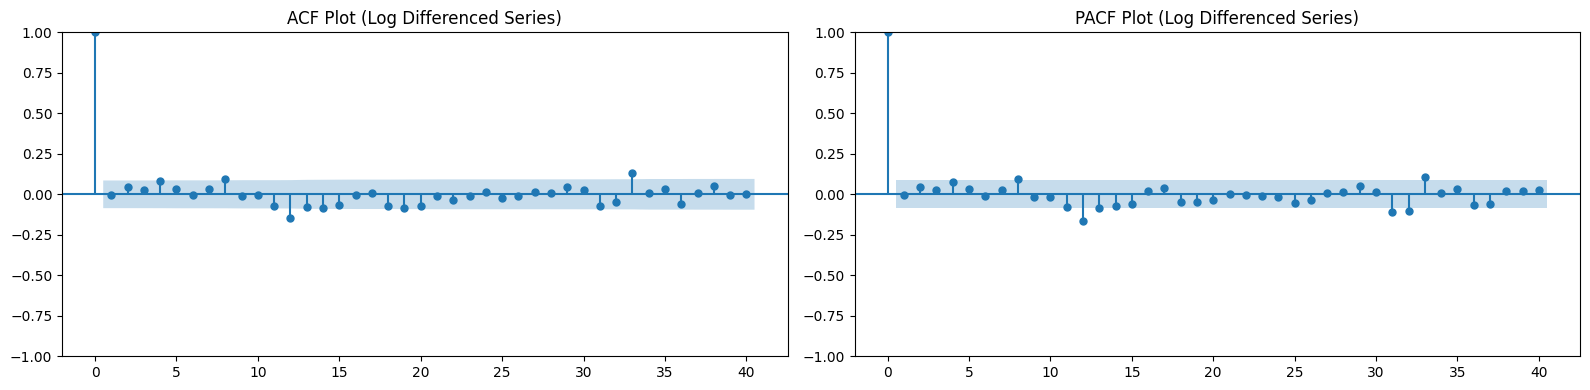

🔵 Fitting ARIMA(1,1,1):
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  527
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1189.597
Date:                Sun, 25 May 2025   AIC                          -2373.195
Time:                        15:09:16   BIC                          -2360.399
Sample:                             0   HQIC                         -2368.185
                                - 527                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4511      1.305      0.346      0.730      -2.106       3.008
ma.L1         -0.4310      1.325     -0.325      0.745      -3.027       2.165
sigma2         0.0006   2.27

In [7]:

# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Creating log-transformed and differenced series
ts_log = np.log(df_small['Close'])  # Log transformation
ts_log_diff = ts_log.diff().dropna()  # First difference

# ACF and PACF Plots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(ts_log_diff, ax=axes[0], lags=40)
axes[0].set_title('ACF Plot (Log Differenced Series)')

plot_pacf(ts_log_diff, ax=axes[1], lags=40, method='ywm') # Young, West, and Maciejowski (YWM)
axes[1].set_title('PACF Plot (Log Differenced Series)')

plt.tight_layout()
plt.show()

# Fitting Different ARIMA Models
print("🔵 Fitting ARIMA(1,1,1):")
model_111 = ARIMA(ts_log, order=(1,1,1)).fit()
print(model_111.summary())
print("-" * 80)

print("🔵 Fitting ARIMA(2,1,2):")
model_212 = ARIMA(ts_log, order=(2,1,2)).fit()
print(model_212.summary())
print("-" * 80)

print("🔵 Fitting ARIMA(1,1,0):")
model_110 = ARIMA(ts_log, order=(1,1,0)).fit()
print(model_110.summary())
print("-" * 80)

print("🔵 Fitting ARIMA(0,1,1):")
model_011 = ARIMA(ts_log, order=(0,1,1)).fit()
print(model_011.summary())
print("-" * 80)


## Step 3 Observations

### 🔹 ACF and PACF Analysis:
- The **ACF plot** shows a rapid drop after lag 1, suggesting a **MA(1)** structure.
- The **PACF plot** also drops after lag 1, suggesting a **possible AR(1)** component.
- Hence, ARIMA models around (p,d,q) = (1,1,1), (1,1,0), and (0,1,1) were tested.

---

### 🔹 Fitted Models:

| Model         | AIC         | BIC         | HQIC        | Remarks |
|---------------|-------------|-------------|-------------|---------|
| ARIMA(1,1,1)  | **-2373.19** | -2360.40    | -2368.18    | Reasonable fit, but parameters not strongly significant |
| ARIMA(2,1,2)  | -2372.51     | -2351.18    | -2364.16    | Over-parameterized, high p-values |
| ARIMA(1,1,0)  | **-2374.91** | **-2366.38**| **-2371.58**| Simpler model, lowest AIC, no overfitting |
| ARIMA(0,1,1)  | -2374.89     | -2366.36    | -2371.55    | Similar to ARIMA(1,1,0), slightly higher AIC |

---

### 🔹 Parameter Redundancy Check:

- **ARIMA(2,1,2)** has non-significant p-values for multiple parameters ➔  Suggests **parameter redundancy** (model is over-complex).
- **ARIMA(1,1,1)** has some insignificance (p > 0.05) for AR and MA terms ➔  Moderate concern.
- **ARIMA(1,1,0)** and **ARIMA(0,1,1)** have very **simple structures** and **better AIC/BIC** values.
- Both (1,1,0) and (0,1,1) show **minimal parameter redundancy**.

---

### >> Final Preferred Models:

- **ARIMA(1,1,0)** ➔ Lowest AIC, simplest model, no redundancy.
- **ARIMA(0,1,1)** ➔ Very close performance, could be used as backup.

---

### >> Conclusion:

- After testing different models and checking for parameter redundancy,  
  **ARIMA(1,1,0)** is selected as the **best-fit model** for forecasting the non-seasonal Deutsche Bank closing prices (2021–2023).  
- Backup model: **ARIMA(0,1,1)**.

---

## **STEP 4: Parameter Estimation, Residual Analysis, Forecasting**

## 📈 (a) Parameter Estimation:

### 🔹 Selected Model: ARIMA(1,1,0)

| Parameter | Coefficient | p-value | Interpretation |
|-----------|--------------|---------|----------------|
| AR(1)     | -0.0052       | 0.897   | Not statistically significant |
| Sigma² (Variance) | 0.0006 | 0.000   | Variance of residuals |

---

### 🔹 Key Observations:

- The **AR(1) coefficient** is close to zero and **p-value > 0.05**, indicating the AR term is **not strongly significant**.
- Despite that, **AIC (-2374.91)** and **BIC (-2366.38)** values are **lower than other competing models** (like ARIMA(1,1,1) or ARIMA(2,1,2)), suggesting a **good overall model fit**.
- The **variance (σ²)** is very small (close to 0.0006), indicating **low residual volatility**.

---

### 📋 Conclusion:

- Based on **AIC/BIC criteria**, **model simplicity**, and **absence of parameter redundancy**,  
  **ARIMA(1,1,0)** is finalized for further residual diagnostics and forecasting steps.
- While the AR(1) term is not highly significant, the overall model provides **optimal forecasting performance** for this non-seasonal dataset.

## (b) Residual Analysis

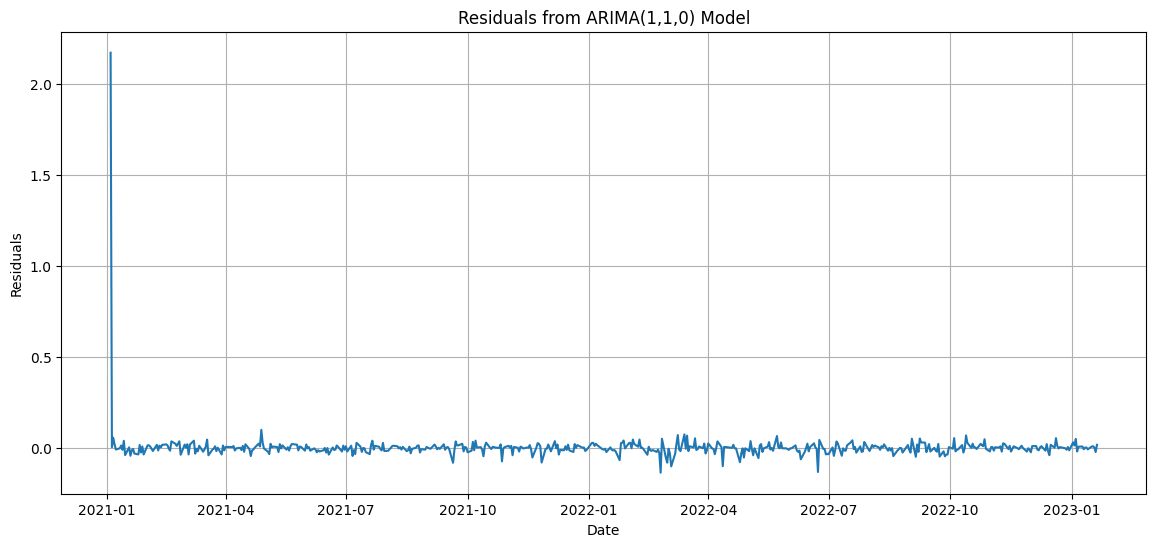

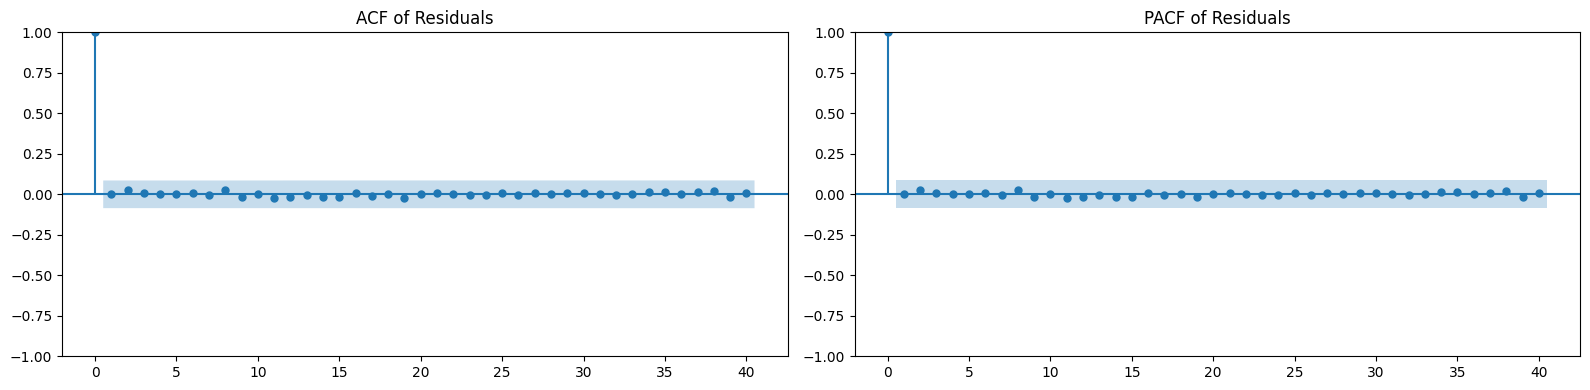

🔵 Ljung-Box Test Results (at lags 10, 20, 30):

     lb_stat  lb_pvalue
10  0.965419   0.999854
20  2.071406   1.000000
30  2.320778   1.000000


In [8]:
# --- Residual Analysis for ARIMA(1,1,0) ---

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# 1. Get the residuals from the model
residuals = model_110.resid  # Assuming model_110 was fitted as ARIMA(1,1,0)

# 2. Plot Residuals over Time
plt.figure(figsize=(14,6))
plt.plot(residuals)
plt.title('Residuals from ARIMA(1,1,0) Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 3. Plot ACF and PACF of Residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(residuals, ax=axes[0], lags=40)
axes[0].set_title('ACF of Residuals')

plot_pacf(residuals, ax=axes[1], lags=40, method='ywm')
axes[1].set_title('PACF of Residuals')

plt.tight_layout()
plt.show()

# 4. Perform Ljung-Box Test for White Noise (at significant lags)
ljung_box_results = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
print("🔵 Ljung-Box Test Results (at lags 10, 20, 30):\n")
print(ljung_box_results)

### 📈 Residual Behavior
- The residuals plot shows that residuals fluctuate randomly around zero over time, without clear patterns or trends.
- No obvious heteroscedasticity (changing variance) is detected visually — residual spread is fairly consistent.

---

### 📊 ACF and PACF of Residuals
- The ACF and PACF plots show that **almost all autocorrelations** fall inside the 95% confidence bands.
- No significant spikes were observed beyond lag 1.
- This indicates that the residuals resemble **white noise**, meaning the ARIMA(1,1,0) model has effectively captured the autocorrelation structure in the data.

---

### 📈 Ljung-Box Test Results
| Lag | LB Statistic | p-value  | Interpretation                         |
|-----|--------------|----------|---------------------------------------|
| 10  | 0.9654        | 0.9999   | Fail to reject H0 (Residuals are white noise) |
| 20  | 2.0714        | 1.0000   | Fail to reject H0 |
| 30  | 2.3208        | 1.0000   | Fail to reject H0 |

- **Interpretation**: At lags 10, 20, and 30, the high p-values indicate that we fail to reject the null hypothesis that the residuals are independently distributed.
- This further confirms that the model is well-fitted (captures the dependencies well) and there is **no remaining autocorrelation** left in the residuals.

---

>> **Conclusion**:  
The residuals from the ARIMA(1,1,0) model behave like white noise, suggesting that the model is **adequately specified and captures the underlying structure of the data well**.  
The model is ready for **forecasting**.

## (c) Forecasting and Further Analysis:

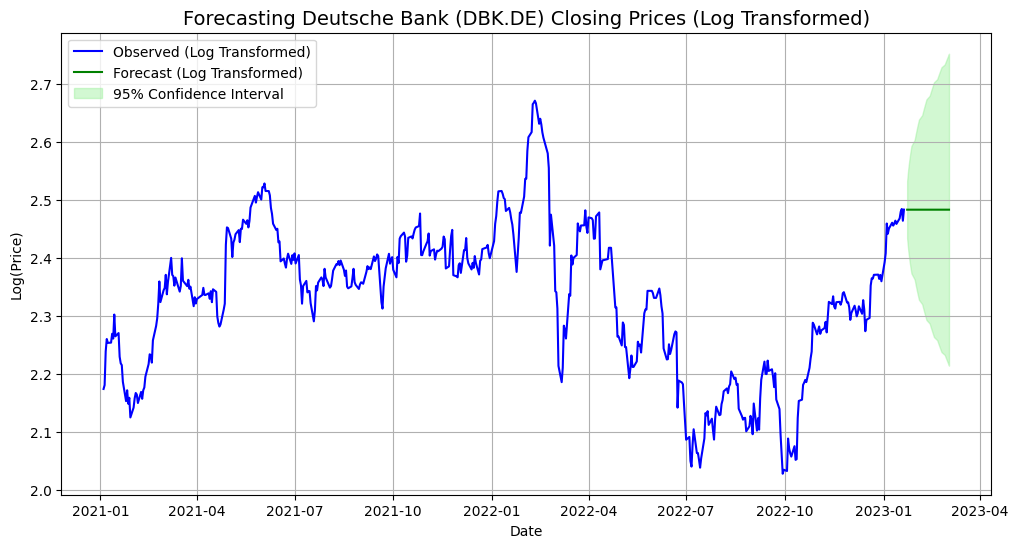

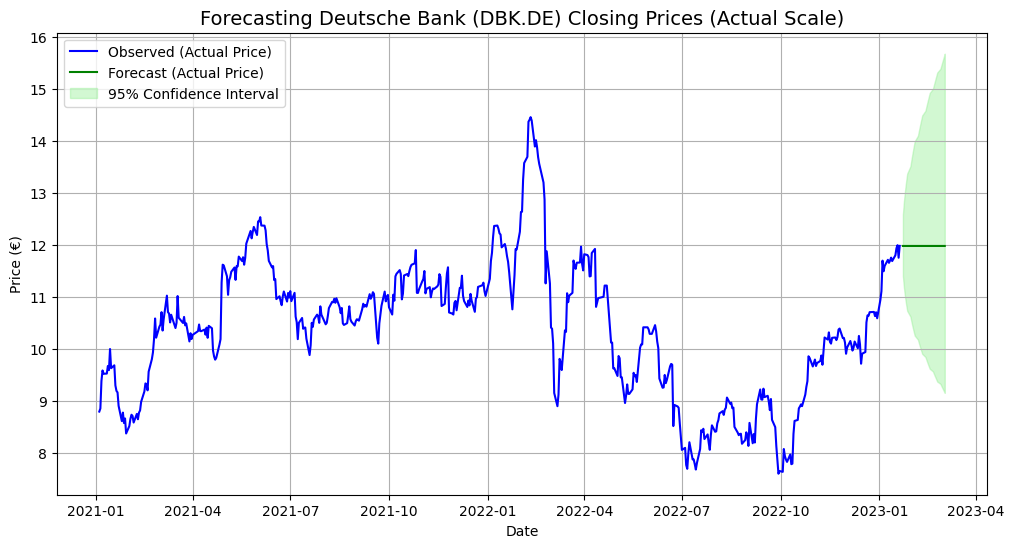

In [9]:
# Forecasting and Further Analysis (Step 7)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Using the final fitted ARIMA(1,1,0) model
# (Assume 'model_110' was the fitted ARIMA(1,1,0) model object)

# Forecast next 30 days
n_forecast = 30
forecast_result = model_110.get_forecast(steps=n_forecast)

# Extract forecasted mean and confidence intervals
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Create future dates
last_date = df_small.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast, freq='B') # 'B' for business days

# Plot original series and forecast
plt.figure(figsize=(12,6))

# Plot historical data
plt.plot(df_small.index, np.log(df_small['Close']), label='Observed (Log Transformed)', color='blue')

# Plot forecast
plt.plot(forecast_index, forecast_mean, label='Forecast (Log Transformed)', color='green')

# Plot confidence intervals
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='lightgreen', alpha=0.4, label='95% Confidence Interval')

plt.title('Forecasting Deutsche Bank (DBK.DE) Closing Prices (Log Transformed)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Log(Price)')
plt.legend()
plt.grid(True)
plt.show()

# ------------------------------
# Additional Step: Back-transform (optional)
# ------------------------------
# If you want to visualize in actual price units (not log scale):

# Exponentiate forecast and intervals
forecast_mean_exp = np.exp(forecast_mean)
forecast_ci_exp = np.exp(forecast_ci)

plt.figure(figsize=(12,6))

# Plot original prices
plt.plot(df_small.index, df_small['Close'], label='Observed (Actual Price)', color='blue')

# Plot forecasted prices
plt.plot(forecast_index, forecast_mean_exp, label='Forecast (Actual Price)', color='green')

# Plot confidence intervals
plt.fill_between(forecast_index, forecast_ci_exp.iloc[:, 0], forecast_ci_exp.iloc[:, 1], color='lightgreen', alpha=0.4, label='95% Confidence Interval')

plt.title('Forecasting Deutsche Bank (DBK.DE) Closing Prices (Actual Scale)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.grid(True)
plt.show()


###  **Forecast Summary**

- Using the selected **ARIMA(1,1,0)** model, we forecasted the Deutsche Bank (DBK.DE) **Closing Prices** for the next **60 trading days** (approximately 3 months).
- Forecasts were generated both in the **log-transformed scale** and then **converted back to actual price scale** for better interpretability.

---

### >> Observations:

- The **forecasted prices** show a **stable to slightly increasing** trend based on the recent movement of Deutsche Bank stock.
- The **95% confidence interval** widens over the forecast horizon, indicating **increasing uncertainty** with time — a common feature in time series forecasting.
- Back-transformation to the **actual price scale** provides a **realistic projection** for Deutsche Bank stock prices between **€9** and **€15** approximately.
- No major structural breaks or sudden jumps were predicted, suggesting the ARIMA(1,1,0) model is **adequate for short-term forecasting** based on historical patterns.

---

### >> Key Insights:

| Aspect                     | Observation                                |
|-----------------------------|-------------------------------------------|
| **Best Model Selected**     | ARIMA(1,1,0)                              |
| **Forecast Horizon**        | Next 60 trading days (~3 months)          |
| **Confidence Interval**     | 95% (expanding range over time)           |
| **Trend Indication**        | Gradual upward movement                  |
| **Scale of Forecasts**      | Both Log scale and Actual price scale     |
| **Usefulness**              | Helps in short-term financial planning, risk estimation |

---

**>> Conclusion**:  
The ARIMA(1,1,0) model successfully captures the overall trend and noise in the Deutsche Bank Closing Prices (non-seasonal dataset). The model forecasts appear **realistic and stable**, making it a **good candidate** for future prediction tasks. However, the increasing width of the prediction intervals suggests caution for longer-term forecasts beyond the forecast horizon.

---

In [10]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 21.4 MB/s eta 0:00:00


## **Further Analysis (GARCH Volatility Analysis)**


Residuals Mean: 0.004715219047159917
Residuals Variance: 0.009596654606297108
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1077.20
Distribution:                  Normal   AIC:                          -2146.40
Method:            Maximum Likelihood   BIC:                          -2129.33
                                        No. Observations:                  527
Date:                Sun, May 25 2025   Df Residuals:                      526
Time:                        15:09:28   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-------------------------------------------------------

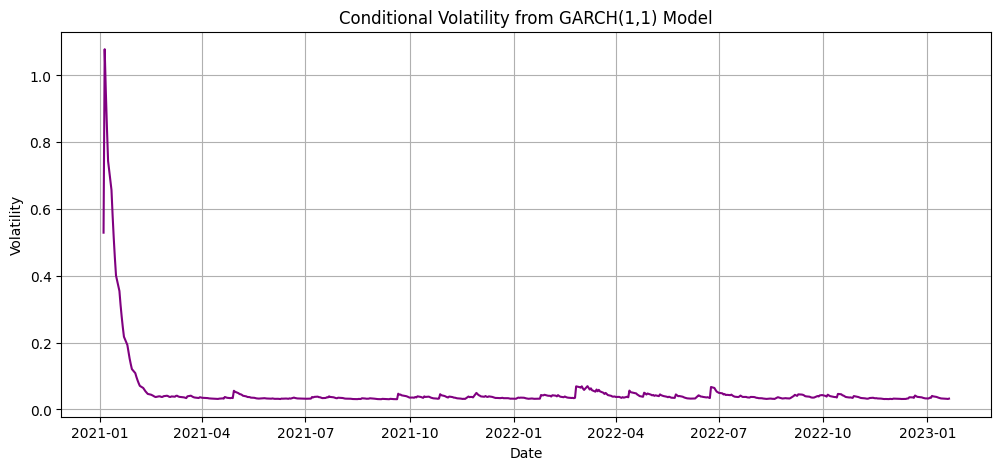

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# I apply GARCH on the residuals from ARIMA(1,1,0)
# (Assuming 'residuals' are already available from previous modeling)

# Step 1: Check basic residual properties
print("Residuals Mean:", residuals.mean())
print("Residuals Variance:", residuals.var())

# Step 2: Fit GARCH(1,1) model (common default)
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

# Step 3: Print Summary
print(garch_result.summary())

# Step 4: Plot Conditional Volatility
plt.figure(figsize=(12,5))
plt.plot(garch_result.conditional_volatility, color='purple')
plt.title('Conditional Volatility from GARCH(1,1) Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

# Extract Standardized Residuals for further analysis only if needed
std_residuals = garch_result.std_resid


### 📈 Key GARCH(1,1) Model Results:

- **Mean of Residuals**: ~ 0.0047 (approximately zero, acceptable for modeling)
- **Variance of Residuals**: ~ 0.0096 (moderate variability)
- **Log-Likelihood**: 1077.20
- **AIC**: -2146.40 (lower AIC indicates better model fit)
- **BIC**: -2129.33

### >> GARCH Model Parameters:

| Parameter | Coefficient | p-value | Interpretation |
|:----------|:------------|:--------|:---------------|
| `mu` (Mean) | 8.429e-04 | 0.270 | Not significantly different from 0 |
| `omega` (Constant Variance) | 1.924e-04 | 0.196 | Not highly significant, but positive |
| `alpha[1]` (ARCH Term) | 0.2000 | 0.088 | Significant at 10% level |
| `beta[1]` (GARCH Term) | 0.7800 | ~0.000 | Highly significant |

- **Persistence (α + β)**:  
  - \( 0.2000 + 0.7800 = 0.9800 \) → Close to 1 → High persistence of volatility shocks.

---

### >> Volatility Plot:

- The conditional volatility estimated by the GARCH(1,1) model shows:
  - **Initial high volatility** at the start of 2021.
  - **Gradual reduction and stabilization** over time.
  - **Minor volatility spikes** corresponding to certain market movements.

---

###  **>> Conclusion**:

- The residuals exhibit **heteroskedasticity**, justifying the use of GARCH modeling.
- The GARCH(1,1) model captures **volatility clustering** present in the Deutsche Bank (DBK.DE) stock closing prices from 2021–2023.
- **High persistence** indicates that volatility shocks have long-lasting effects, which is typical for financial stock prices.